#                             Haberman cancer survival analysis

-> It is a famous haberman survival dataset that has been taken from kaggle.
link for the dataset  https://www.kaggle.com/gilsousa/habermans-survival-data-set.
-> In this ipython notebook we are going to learn various plotting techniques and various technical terms like - PDF, CDF etc, there meaning and use.
-> In the end our final objective will be to classify various cancer patients so that we can predict a new patient whether he will survive or not. 
-> Objective - classify a new patient whether as new patient will survive from cancer or not.

Attribute Information:
  30 or age :  Age of patient at time of operation (numerical)
  64 or year:  Patient's year of operation (year - 1900, numerical)
  1 or node :  Number of positive axillary nodes detected (numerical)
  survival_year:  Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [71]:
# here we are importing various python libraries to do the desired task.
import pandas as pd   #https://pandas.pydata.org/
import seaborn as sns    #https://seaborn.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import numpy as np

In [72]:
# load the daataset into the pandas dataset
data = pd.read_csv("haberman.csv")
data.head(4)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


In [73]:
#changing the name of the column name as we were unable to underdatnd the meaning of the each column
data = data.rename(index = str,columns = {"30" : "patient_age","64" :"operation_year","1" : "axile_node","1.1" : "survival_year"})

In [74]:
print(data.head(5))
#age ->it tells us when a petient was digonse the cancer
#year -> it tells us when the operation was done
#node -> technical term in cancer, i think it tells about the intensity of the cancer
#survival_year -> it tells us how many years a patient survive after it's operation

   patient_age  operation_year  axile_node  survival_year
0           30              62           3              1
1           30              65           0              1
2           31              59           2              1
3           31              65           4              1
4           33              58          10              1


In [49]:
print(data.info())
# there are total 305 rows in the dataset
# no value in the dataset is null
print("*********")
print(data.columns) #it is giving us information about the columns.
print("**********")
print(data.shape) #dimensions of the data

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 304
Data columns (total 4 columns):
patient_age       305 non-null int64
operation_year    305 non-null int64
axile_node        305 non-null int64
survival_year     305 non-null int64
dtypes: int64(4)
memory usage: 11.9+ KB
None
*********
Index(['patient_age', 'operation_year', 'axile_node', 'survival_year'], dtype='object')
**********
(305, 4)


In [50]:
data["survival_year"].unique()
# there are two values in the dataset for survival_year column either 1 or 2


array([1, 2])

In [51]:
data["survival_year"].value_counts()
#in the dataset there are 224 patients who survived for more then 5 years and there are 81 patients who died with in 5years

1    224
2     81
Name: survival_year, dtype: int64

# 2-D scatter plot using various fetaures of the data

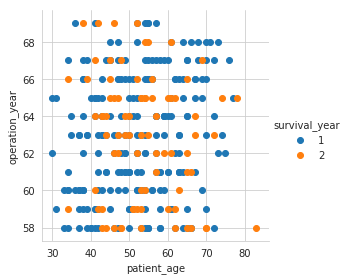

In [52]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "survival_year",height =4) \
         .map(plt.scatter,"patient_age","operation_year")\
         .add_legend()
plt.show()

-> by looking the above plot we can not predict much but we can say, given patient_age and operation_year we can say that if patient_age is less then 40 it is highly likely that patient will survive for more than 5 years.

sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "survival_year",height =4) \
         .map(plt.scatter,"patient_age","axile_node")\
         .add_legend()
plt.show()
# in the plot patient patient_age vs axile_node we can get some information about the patient survival
# we can say that if a patient is less than 40 years old and axile_node is less than 20, it is more likely that patient will
#for more then 5 years, but for rest of the patient we can not predict anyting very clearly.

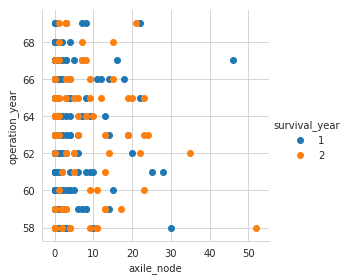

In [54]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue = "survival_year",height = 4)\
    .map(plt.scatter,"axile_node","operation_year")\
    .add_legend()
plt.show()
#by looking this 2-d plot we can not get any information about the patient survival_year as all the 1 and 2 points are
#scattered with each other.

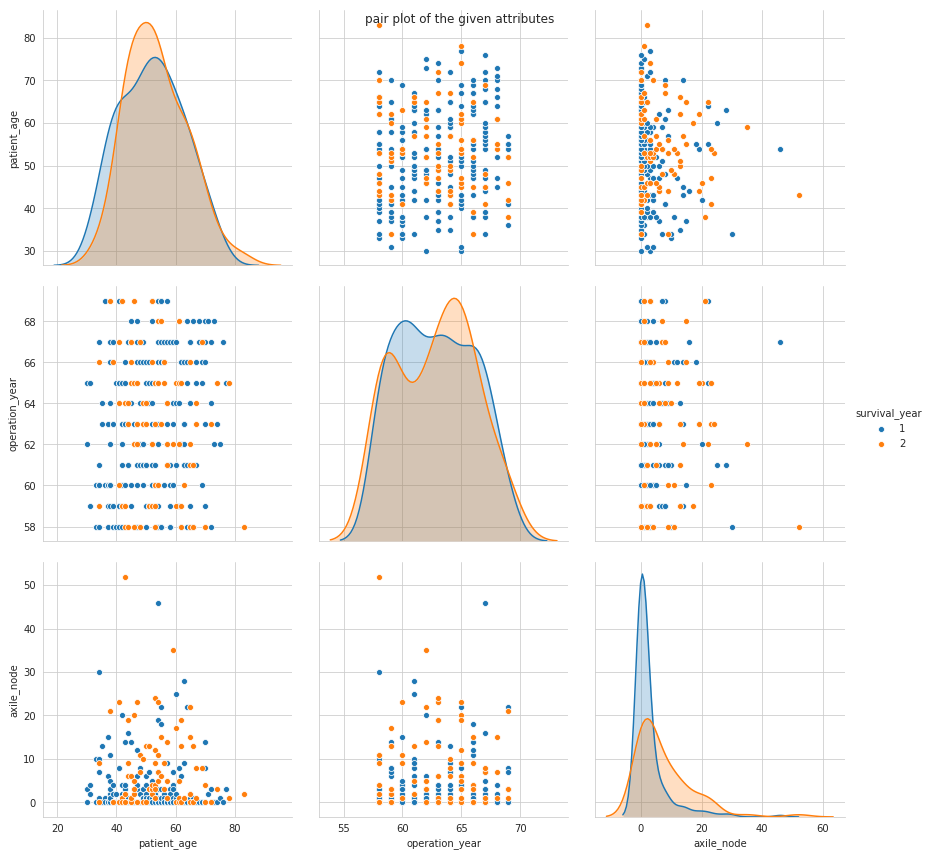

In [84]:
#here we are generating paiplot based on survival_year
#pairplots are useful when there are less number of features in the data as it plots n*n number of plots if there are
#n number of features excluding the target feature( target feature means that we are trying to predict)
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.pairplot(data, hue = "survival_year", vars = ["patient_age", "operation_year", "axile_node"], height = 4)
plt.suptitle("pair plot of the given attributes")
plt.show()

-> by looking the above plots we can not find out much information or we can say that we can not find out any information.

# Histogram, PDF, CDF
Histogram ->   A histogram is a plot that allow us to discover, and show, the underlying frequency distribution of a set of continuous data.  https://en.wikipedia.org/wiki/Histogram
PDF ->  https://www.investopedia.com/terms/p/pdf.asp
CDF ->  https://en.wikipedia.org/wiki/Cumulative_distribution_function


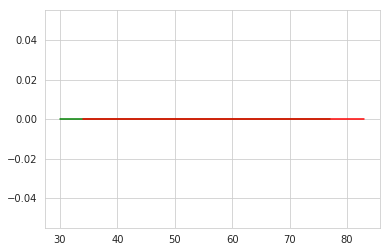

In [88]:
# 1-d scatter plot using only one feature i.e. patient_age
data_m = data.loc[data["survival_year"]==1]; # all patient who will survive for more then 5 years
data_l = data.loc[data["survival_year"]==2];# all patient who will die with in 5 years
plt.plot(data_m["patient_age"], np.zeros_like(data_m["patient_age"]), 'g')
plt.plot(data_l["patient_age"],np.zeros_like(data_l["patient_age"]),'r')
plt.show()

-> from 1-d scatter plot it is very difficult to find out some information.
-> so we can say 1-d plot are not much useful

/home/rajput/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


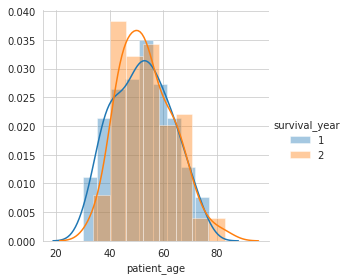

In [90]:
sns.FacetGrid(data,hue="survival_year",height = 4)\
    .map(sns.distplot,"patient_age")\
    .add_legend()
plt.show()

-> from the plot we can say that the patients whoes age is less then 38 or 40 are surviving more but such people are very less and the people whose age is more then 75 are highly like that they will die with in 5 years such people are also very less.
-> for rest of the age group the it is very difficult to predict anything based on the age, and majority of the patients lies in this category.

/home/rajput/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


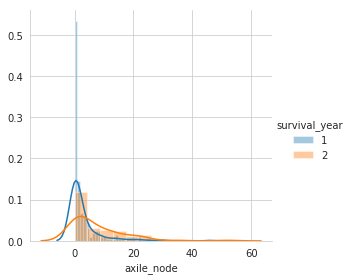

In [96]:
sns.FacetGrid(data,hue="survival_year",height = 4)\
    .map(sns.distplot,"axile_node")\
    .add_legend();
plt.show();

->from the above plot we can say that the patients with 0 axile_node have a very high chances of surviving more then 5 years, but for rest of the category plot is not saying anything as most of the points are not clearly classified by only axile_node.

/home/rajput/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


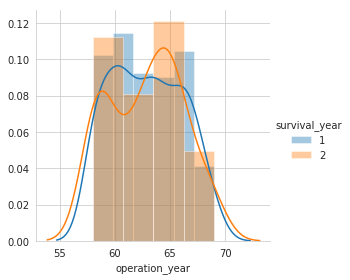

In [116]:
sns.FacetGrid(data,hue="survival_year",height = 4)\
    .map(sns.distplot,"operation_year")\
    .add_legend();
plt.show();

-> in operation year plot we can not say anything as every thing is overlapping.

pdf and cdf for patient_age:
[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
***********
pdf and cdf for axile node
[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
[0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]


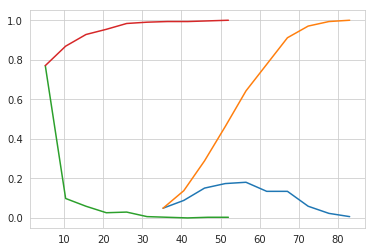

In [131]:
#CDF 
counts, bin_edges = np.histogram(data['patient_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print("pdf and cdf for patient_age:")
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(data['axile_node'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
print("***********")
print("pdf and cdf for axile node")
print(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
plt.show();

-> in the above plot blue curve is representing the pdf curve for patient_age, by looking this curve we can say that in our data most of the patients are from the age group 43-70, and highest number of people are from the age group 55 or we can say that 20% people are from the age group 55.
-> in the plot orange line is representing the CDF for patient_age by looking the cdf we can say that approx 75% patients are in the age group less then 60 years and 40% patients are less than 50 years old.
->********************************************
-> in the above plot green curve is representing the pdf curve for axile_node, by looking this curve we can say that in our data most of the patients are having axile_node in the range of 0-8, and most number of people approx 65% are having axile node as 0.  
 ->in the plot red line is representing the CDF for axile_node by looking the cdf we can say that approx 80% patients are having axile node less then 8 and approx 83% patients are having axile node less then or equals to 10.

NOTE -> here we are not ploting the pdf and cdf for operation year as it will not giv much information


# Mean, Standard-deviation, and variance

In [143]:
print("Mean of the features in the dataset")
print(np.mean(data["patient_age"]))           # avg age of the patients in the dataset
print(np.mean(data["operation_year"]))        # avg year in which the patients operation was done not much informative
print(np.mean(data["axile_node"]))            # avg axile_node in all the patients of the given dataset

Mean of the features in the dataset
52.5311475409836
62.84918032786885
4.036065573770492


In [142]:
print("variance of the features in the dataset:")
print(np.var(data["patient_age"]))   # variance for patient age
print(np.var(data["axile_node"]))     
print(np.var(data["operation_year"]))

variance of the features in the dataset:
115.05558720773986
51.660994356355815
10.554302606826123


In [141]:
print("standard daviation of the features in the data set:")
print(np.std(data["patient_age"]))
print(np.std(data["operation_year"]))
print(np.std(data["axile_node"]))

standard daviation of the features in the data set:
10.726396748570316
3.2487386178063207
7.187558302814372


In [158]:
print("quantiles in the features of the dataset:")
print(np.percentile(data["patient_age"],np.arange(0,125,25)))
print(np.percentile(data["axile_node"],np.arange(0,125,25)))
print(np.percentile(data["operation_year"],np.arange(0,125,25)))

quantiles in the features of the dataset:
[30. 44. 52. 61. 83.]
[ 0.  0.  1.  4. 52.]
[58. 60. 63. 66. 69.]


# Box Plot and Whiskers Plot
-> It is another methode of visualizing the data in 1-D, It uses the concept of quantile
-> https://en.wikipedia.org/wiki/Box_plot

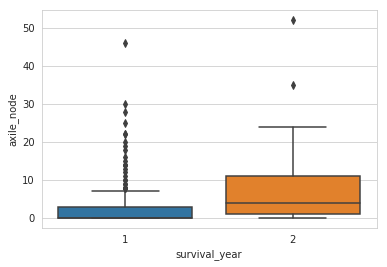

In [159]:
sns.boxplot(x= "survival_year",y="axile_node",data = data)
plt.show()

-> From the above plot we can see that if some patient lies in the category 2 means if the patient dies within 5 years then it is highly likely that patient will be having axile_node more then 5 or even 3.

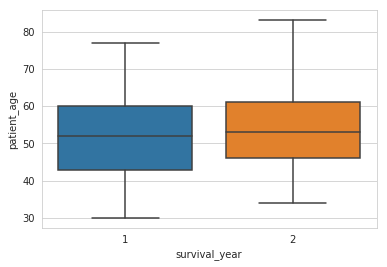

In [160]:
sns.boxplot(x="survival_year",y="patient_age",data=data)
plt.show()

-> By looking the above plot we can say that if the patient's age is less then 45 then it is highly likely that he will survive for more then 5 years.

# Violin plots

/home/rajput/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


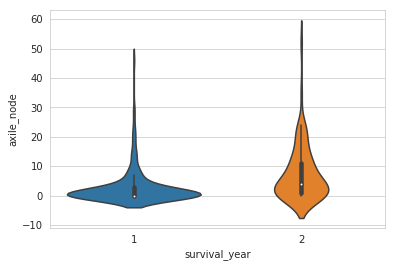

In [161]:
sns.violinplot(x="survival_year", y="axile_node", data=data, size=8)
plt.show()

/home/rajput/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


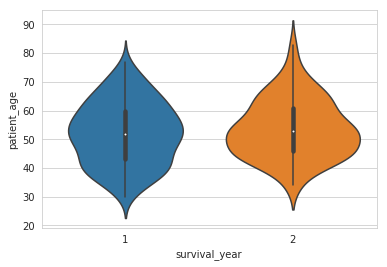

In [162]:
sns.violinplot(x="survival_year", y="patient_age", data=data, size=8)
plt.show()

Observations ->
1. Most of the plots are unable to classify the data in survival status 1 and 2.
2. Very less information can be gathered by the above plots.
3. So we can say that the given data set may be imbalance.